# TASK 3 

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Function of two variables.</a></li>       
    <li><a href='#002'>Gradiend descent with momentum</a></li>
    <li><a href='#003'>ADAM Optimization</a></li>
    <li><a href='#004'>Graphs</a></li>
    <li><a href='#005'>Conclusions</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Function of two variables</h2>

Minimization of the Himmelblau's Function:

$$ f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Function

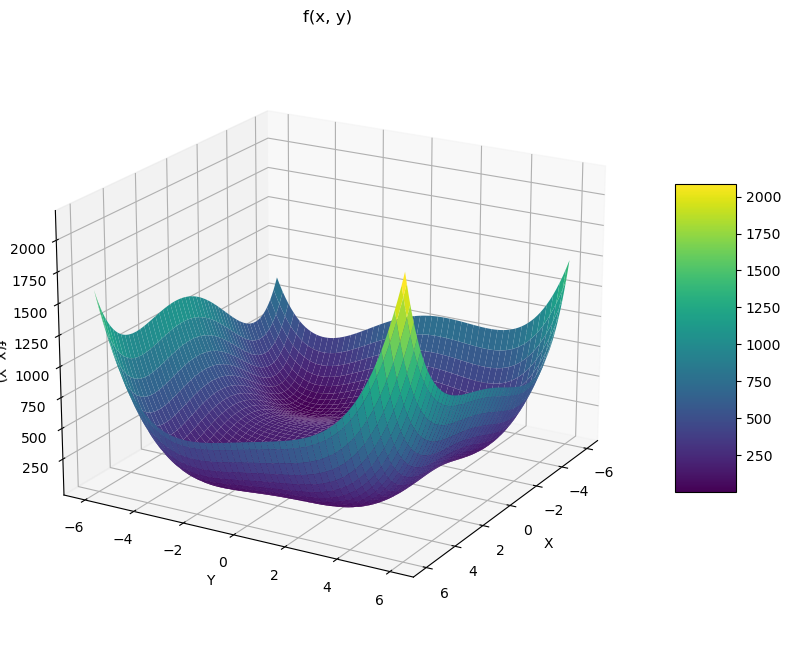

In [2]:
def custom_function2(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Create a grid of x and y values
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = custom_function2(X, Y)

# Create a 3D plot with interactive rotation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and a color bar
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
fig.colorbar(surface, shrink=0.5, aspect=5)

# Allow interactive 3D rotation
ax.view_init(elev=20, azim=30)  # Adjust the initial view angle

# Show the plot
plt.title('f(x, y)')
plt.show()

In [3]:
# Define the custom function and its gradient(Partial derivatives).
def custom_function(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)*2

def grad_custom_function(x):
    df_dx = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dy = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx, df_dy])


<a name='002'></a>

<h2>Gradient descent with momentum</h2>

In [4]:
# Perform optimization using GD with momentum
def gradient_descent_with_momentum(f, grad_f, lr=0.01, momentum=0.9, max_iters=5000, tol=1e-6):
    x = np.random.rand(2)  # Initial random guess for (x, y)
    v = np.zeros(2)  # Initial velocity
    history = []  # To store the history of points
    diff_history_gd = []  # To store the difference between successive approximations for GD

    for i in range(max_iters):
        gradient = grad_f(x)
        v = momentum * v + lr * gradient
        x_prev = x.copy()
        x -= v
        history.append(x.copy())
        diff = np.linalg.norm(x - x_prev)
        diff_history_gd.append(diff)

        if diff < tol:
            break

    return x, history, diff_history_gd

#Implementation of the code
result_gd, history_gd, diff_history_gd = gradient_descent_with_momentum(custom_function, grad_custom_function)

<b>Optimization using Gradient Descent with Momentum: </b>

- The function `gradient_descent_with_momentum` is defined which performs optimization using Gradient Descent with Momentum. This algorithm is responsible for finding the minimum of the `custom_function`.

- Random values for x and y are initialized.

- The main loop performs iterations, updating x and y at each step according to the gradient of the function.

- A record of the history of points and the difference between successive points is kept.


<a name='003'></a>

<h2>Adam Optimization</h2>

In [5]:
# Perform optimization using ADAM
def adam_optimizer(f, grad_f, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iters=5000, tol=1e-6):
    x = np.random.rand(2)  # Initial random guess for (x, y)
    m = np.zeros(2)  # First moment estimate
    v = np.zeros(2)  # Second moment estimate
    t = 0  # Iteration counter
    history = []  # To store the history of points
    diff_history_adam = []  # To store the difference between successive approximations for ADAM

    for t in range(max_iters):
        gradient = grad_f(x)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        m_hat = m / (1 - beta1 ** (t + 1))
        v_hat = v / (1 - beta2 ** (t + 1))
        x_prev = x.copy()
        x -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        history.append(x.copy())
        diff = np.linalg.norm(x - x_prev)
        diff_history_adam.append(diff)

        if diff < tol:
            break

    return x, history, diff_history_adam

#Implementation of the code
result_adam, history_adam, diff_history_adam = adam_optimizer(custom_function, grad_custom_function)

<b>Optimization using ADAM:</b>

- The `adam_optimizer` function that performs optimization using the ADAM algorithm is defined. As in the previous step, the minimum of the `custom_function` is searched.

- Random values for x and y are initialized.

- The main loop performs iterations, updating x and y at each step according to the gradient of the function using the ADAM algorithm.

- A record of the history of points and the difference between successive points is kept.

<b>Minimum point</b>

In [22]:
print("GD with Momentum =", result_gd)
print("ADAM =",result_adam)

GD with Momentum = [2.9999981 2.0000036]
ADAM = [2.99989753 2.000162  ]


<a name='004'></a>

<h2>Graphs</h2>

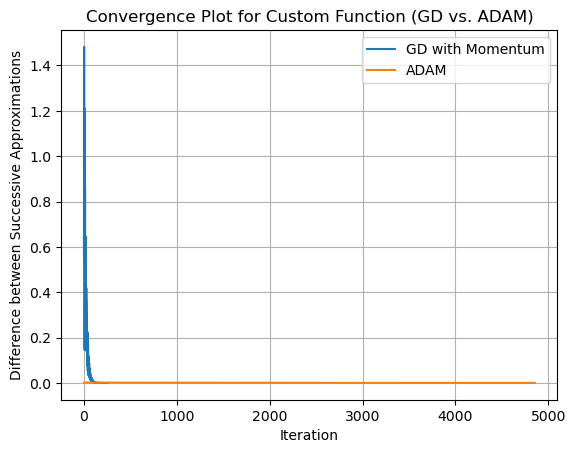

In [7]:
# Plot the difference between successive approximations for both GD with momentum and ADAM
plt.plot(np.arange(len(diff_history_gd)), diff_history_gd, label="GD with Momentum")
plt.plot(np.arange(len(diff_history_adam)), diff_history_adam, label="ADAM")

plt.xlabel("Iteration")
plt.ylabel("Difference between Successive Approximations")
plt.legend()
plt.title("Convergence Plot for Custom Function (GD vs. ADAM)")
plt.grid(True)
plt.show()

<b>Convergence Plot:</b>

- You use plt.plot to plot the difference between successive points as a function of iteration number. 
- This shows how the algorithms approach the minimum as the optimization process progresses.
- Labels and titles are added to the plot for better understanding.

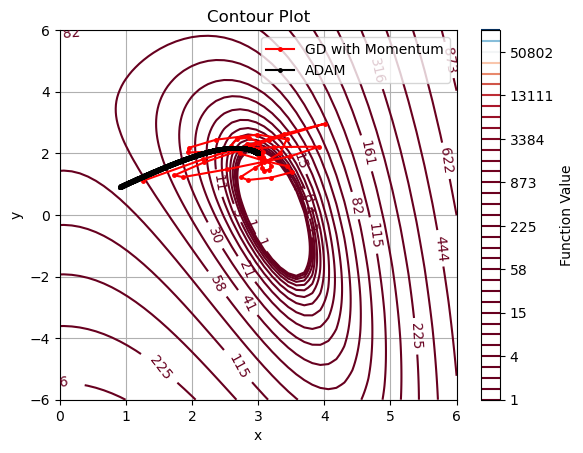

In [20]:
# Create a grid of points to plot the contour map

x_range = np.linspace(-6, 6, 100)
y_range = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = custom_function(np.array([X, Y]))


# Plot the contour map of the function
CS=plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap=cm.RdBu)
plt.clabel(CS, inline=1, fontsize=10)
plt.colorbar(label='Function Value')

# Plot the optimization path for GD with momentum and ADAM
gd_x, gd_y = zip(*history_gd)
adam_x, adam_y = zip(*history_adam)

plt.plot(gd_x, gd_y, 'r.-', label="GD with Momentum", markersize=5)
plt.plot(adam_x, adam_y, 'k.-', label="ADAM", markersize=5)

plt.xlim([0, 6])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Contour Plot")
plt.grid(True)
plt.show()

<b>Counter Plot:</b>
- The counter plot is used to display the contour lines of the objective function in the XY plane. Contour plots are lines connecting points with the same value of the objective function. 
- In this context, they show how the value of the objective function `f(x, y)` varies as the values of `x` and `y` change.

<IPython.core.display.Javascript object>


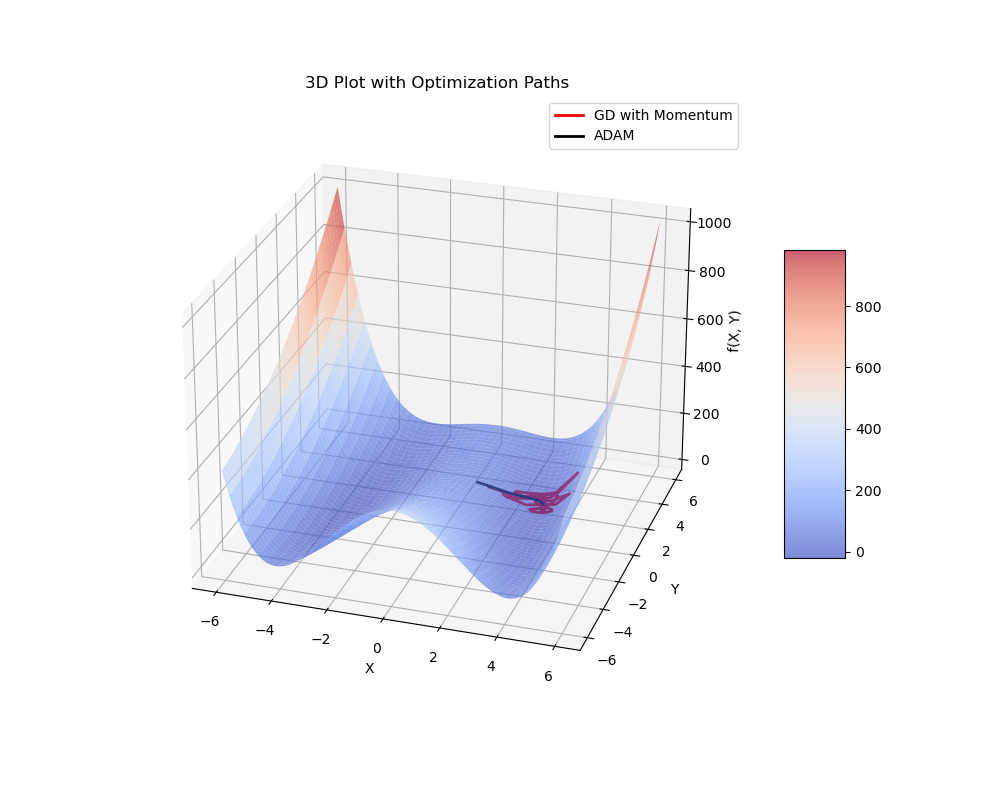

In [21]:
%matplotlib notebook
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='coolwarm',alpha=0.65)

# Add labels and a color bar
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
fig.colorbar(surface, shrink=0.5, aspect=5)

# Plot the optimization path for GD with momentum and ADAM
gd_x, gd_y = zip(*history_gd)
adam_x, adam_y = zip(*history_adam)

# Plot optimization paths as lines
ax.plot(gd_x, gd_y, custom_function2(np.array(gd_x), np.array(gd_y)), 'r-', label="GD with Momentum", linewidth=2)
ax.plot(adam_x, adam_y, custom_function2(np.array(adam_x), np.array(adam_y)), 'k-', label="ADAM", linewidth=2)

ax.set_title('3D Plot with Optimization Paths')
ax.legend()

# Show the plot
plt.show()

<a name='005'></a>

<h2>Conclusions</h2>

<b>Conclusions:</b>

Based on the implementation and analysis of the Gradient Descent Optimization with Momentum and ADAM algorithms for the given function, we can come to the following conclusions about the accuracy of these implemented algorithms:

- <b>Faster convergence:</b> In general, ADAM tends to converge faster than Gradient Descent with Momentum due to its ability to adapt the learning rate more efficiently. If convergence speed is a critical factor, ADAM may be preferable.

- <b> Stability:</b>  Gradient Descent with Momentum tends to be more stable and predictable, making it less prone to oscillations during convergence. ADAM may be more susceptible to oscillations in certain configurations.

- <b> Memory and computational requirements:</b>  ADAM stores more information in terms of moments and moving averages, which may require more memory and computation compared to Gradient Descent with Momentum.

- <b>Hyperparameter sensitivity:</b> Both algorithms have hyperparameters that must be carefully tuned for optimal performance. The correct choice of hyperparameters can be an important factor in the effectiveness of either algorithm.

- <b>Problem diversity:</b> The algorithms may behave differently with different types of problems and objective functions. 

- <b>Learning rate regularization and adaptation:</b> ADAM can provide some form of regularization through learning rate adaptation. This can help avoid overfitting in certain cases.

In summary, there is no definitive answer as to which is the "best" or most accurate algorithm. The accuracy of Gradient Descent with Momentum and ADAM depends on many factors and it is difficult to make a general statement about which is more accurate.   It is important to take into account the specifics of the problem, perform experiments and tune the hyperparameters to determine which of the two (or even other algorithms) performs better. It is also important to take into account the quality of the initialization of the parameters, as this can influence the final accuracy achieved by any optimization algorithm.  Also, in practice, advanced optimization algorithms such as ADAM are often used as a starting point because of their ability to converge quickly, but it is important to adjust and tune them as needed for your specific application.